In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [22]:
diabetes = pd.read_csv('diabetes.csv')

In [23]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
#Check the dimensions of the dataset
diabetes.shape

(768, 9)

In [25]:
#View all the features of dataset
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
#Check for null values aand type of each feature
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
#Outcome is the feature to be predicted
# 0->No Diabetes
# 1-> Diabetes
#Check count of each outcome
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

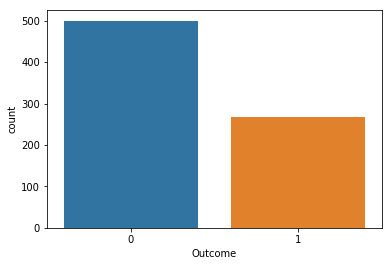

In [28]:
#Graphical view for count of each outcome
sns.countplot(diabetes['Outcome'])

# Data Splitting

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = diabetes.drop('Outcome',axis =1)
y = diabetes['Outcome']

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =6)

# Logistic Regression

In [129]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
#Create an instance
logr = LogisticRegression()

In [130]:
#Fit the training data
logr.fit(x_train,y_train)

C:\Users\aronp\Anaconda3\envs\aron3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [131]:
#Prediction
pred_logr= logr.predict(x_test)

In [132]:
#Print Accuracy Score
print("Testing Accuracy:{:.3f}".format(accuracy_score(pred_logr,y_test)))

Testing Accuracy:0.805


In [133]:
#Print Confusion Matrix
print(confusion_matrix(pred_logr,y_test))

[[93 20]
 [10 31]]


# KNN

In [134]:
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [144]:
#Make Confusion Matrix for input
#Calculate confusion matrices for different values of k at random and then calculate its accuracy
train_accuracy = []
test_accuracy = []
for k in range (1,15,1):
    print("K=",k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    print("Train Confusion MAtrix")
    print(confusion_matrix(y_train,neigh.predict(x_train)))
    print("Test Confusion Matrix")
    print(confusion_matrix(y_test,neigh.predict(x_test))) 
    print(accuracy_score(y_test, neigh.predict(x_test)))
    print("-"*50)
#Calculate accuracy for plotting graphs    
    train_accuracy.append(accuracy_score(y_train,neigh.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test,neigh.predict(x_test)))


K= 1
Train Confusion MAtrix
[[397   0]
 [  0 217]]
Test Confusion Matrix
[[79 24]
 [17 34]]
0.7337662337662337
--------------------------------------------------
K= 2
Train Confusion MAtrix
[[397   0]
 [108 109]]
Test Confusion Matrix
[[91 12]
 [31 20]]
0.7207792207792207
--------------------------------------------------
K= 3
Train Confusion MAtrix
[[360  37]
 [ 59 158]]
Test Confusion Matrix
[[78 25]
 [19 32]]
0.7142857142857143
--------------------------------------------------
K= 4
Train Confusion MAtrix
[[380  17]
 [102 115]]
Test Confusion Matrix
[[88 15]
 [25 26]]
0.7402597402597403
--------------------------------------------------
K= 5
Train Confusion MAtrix
[[353  44]
 [ 78 139]]
Test Confusion Matrix
[[81 22]
 [22 29]]
0.7142857142857143
--------------------------------------------------
K= 6
Train Confusion MAtrix
[[369  28]
 [105 112]]
Test Confusion Matrix
[[89 14]
 [24 27]]
0.7532467532467533
--------------------------------------------------
K= 7
Train Confusion MAtrix


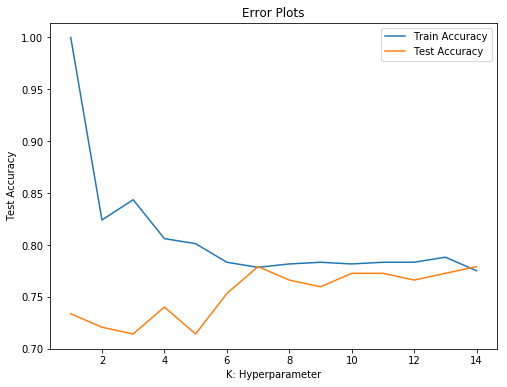

In [145]:
#Select random k values
k = np.arange(1,15,1)

#Compare accuracuies for differnt values of k
plt.subplots(figsize = (8,6))
plt.plot(k ,train_accuracy ,label = 'Train Accuracy')
plt.plot(k ,test_accuracy ,label = 'Test Accuracy')
plt.legend()

#Name the labels
plt.xlabel("K: Hyperparameter")
plt.ylabel("Test Accuracy")
plt.title("Error Plots")

plt.show()

In [146]:
#The Plot suggests us to choose k=13
#Print Confusion Matrix
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train,y_train)
print("The Confusion Matrix is")
print(confusion_matrix(y_test,neigh.predict(x_test)))

The Confusion Matrix is
[[86 17]
 [17 34]]


In [147]:
pred = neigh.predict(x_test)
teacc= accuracy_score(y_test,pred)
print("Test Accuracy =",teacc)

Test Accuracy = 0.7792207792207793


# SVM

In [148]:
#Import SVM Classifier
from sklearn.svm import SVC 

In [149]:
svclassifier = SVC(kernel = 'linear' , gamma='scale')

In [150]:
svclassifier.fit(x_train, y_train )  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [151]:
pred_svm = svclassifier.predict(x_test)  

In [153]:
print(confusion_matrix(y_test,pred_svm))  

[[91 12]
 [19 32]]


In [158]:
print("Test Accuracy:",accuracy_score(y_test,pred_svm))

Test Accuracy: 0.7987012987012987


# Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [160]:
rfc.fit(x_train, y_train)

C:\Users\aronp\Anaconda3\envs\aron3.6\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
pre_rfc = rfc.predict(x_test)

In [166]:
print(confusion_matrix(y_test,pre_rfc))  

[[85 18]
 [21 30]]


In [167]:
print("Test Accuracy:",accuracy_score(y_test,pre_rfc))

Test Accuracy: 0.7467532467532467


# Decision Tree

In [169]:
from sklearn.tree import DecisionTreeClassifier


In [170]:
dtree = DecisionTreeClassifier(random_state=0)

In [171]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [173]:
pred_dtree = dtree.predict(x_test)

In [174]:
print(confusion_matrix(y_test,pred_dtree))  

[[89 14]
 [25 26]]


In [175]:
print("Test Accuracy:",accuracy_score(y_test,pred_dtree))

Test Accuracy: 0.7467532467532467
